<div style="display:block" direction=rtl align=right><br><br>
    <div  style="width:100%;margin:100;display:block"  display=block align=center>
        <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
        <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
        <span><br><font size=5>University of Tehran , school of ECE</font></span>
        <span><br><font size=3>Data Analytics Course</font></span>
        <span><br><font size=3>Fall 2022</font></span>
    </div><br><br><br>
    <div style="display:block" align=left display=block> 
        <font size=3>Homework 2</font><br>
        <hr />
        <font size=3>TA: <a href="mailto:farzaneh.hatami@ut.ac.ir">Farzaneh Hatami</a><br></font><br>
    </div>
</div>

# EDA and Visualization

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas.core.series
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

## Part1 - EDA and Visualization

1. A quick peek at the data

In [3]:
taxis = sns.load_dataset('taxis')
taxis.head(5)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [3]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pickup           6433 non-null   object 
 1   dropoff          6433 non-null   object 
 2   passengers       6433 non-null   int64  
 3   distance         6433 non-null   float64
 4   fare             6433 non-null   float64
 5   tip              6433 non-null   float64
 6   tolls            6433 non-null   float64
 7   total            6433 non-null   float64
 8   color            6433 non-null   object 
 9   payment          6389 non-null   object 
 10  pickup_zone      6407 non-null   object 
 11  dropoff_zone     6388 non-null   object 
 12  pickup_borough   6407 non-null   object 
 13  dropoff_borough  6388 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 703.7+ KB


#### because the datatimes were read as object type, I'll convert them to datatime

In [3]:
taxis.pickup = pd.to_datetime(taxis.pickup)
taxis.dropoff = pd.to_datetime(taxis.dropoff)
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

2. Number of trips

```
# This is formatted as code
```



In [5]:
total_trips = len(taxis)
print(f"total number of trips: {total_trips}")

total number of trips: 6433


3. Number of unique pickup-zones

In [6]:
unique_pkz = taxis.pickup_zone.unique()
print(f"number of unique pickup zones: {len(unique_pkz)}")

number of unique pickup zones: 195


4. Most frequent drop-zones

#### part a

In [4]:
most_freq_doz = taxis.groupby('dropoff_zone')['dropoff_zone'].count().sort_values(ascending = False)
most_freq_doz.head(1)

dropoff_zone
Upper East Side North    245
Name: dropoff_zone, dtype: int64

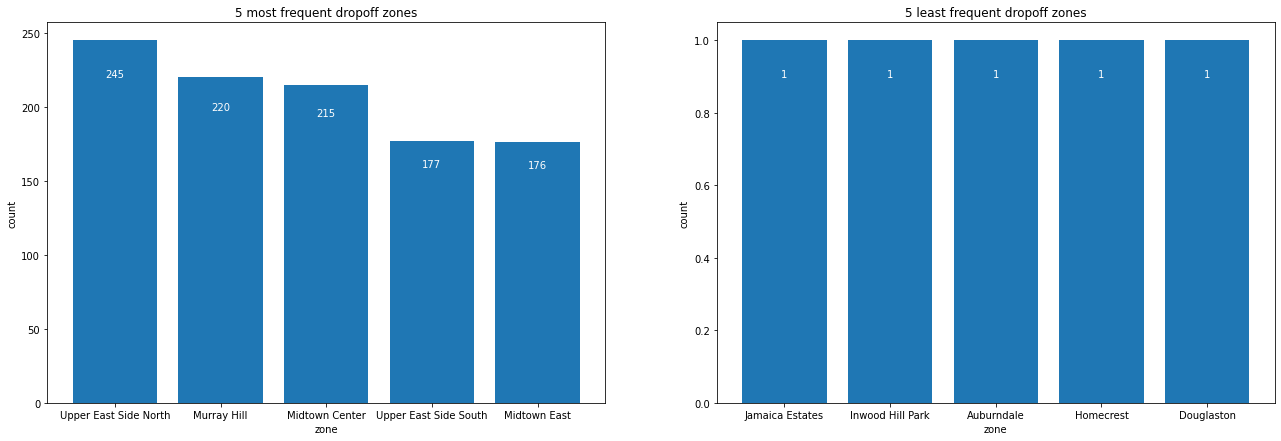

In [5]:
top5_doz = most_freq_doz.head(5)
low5_doz = most_freq_doz.tail(5)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]-y[i]*0.1,y[i],ha = 'center',color = "white")

plt.figure(figsize=(22,7))
plt.subplot(1,2,1)
plt.bar(top5_doz.index,top5_doz.values)
plt.xlabel("zone")
plt.ylabel("count")
addlabels(top5_doz.index,top5_doz.values)
plt.title("5 most frequent dropoff zones")

plt.subplot(1,2,2)
plt.bar(low5_doz.index,low5_doz.values)
plt.xlabel("zone")
plt.ylabel("count")
addlabels(low5_doz.index,low5_doz.values)
plt.title("5 least frequent dropoff zones");

#### part b

#### All of the most frequent dropoff zones are in Mahattan area. this makes<br>sense because Mahattan is the most densely populated of New York City’s 5 boroughs and it is one of the world’s major commercial, financial and cultural centers. because of its population, welfare of its residents & poularity of it, there are more rides to these destinations.
#### in contrast, there has been just 1 ride to the least frequent dropoff zones. "jamaica estates" & "Douglaston" are in Queens, which is one of the lowest income & most dangerous parts of the city. while the other 3 zones are parks. since people ususally go to parks in groups (as a family, or friends), they might go there by their own car or with other types of transportion (than taxi) that is suitable for a larger number of people.

5. Percentage of drop-offs and pick-ups per weekday

In [4]:
# adding the "day_of_week" colummn to dataset
taxis['pickup_day'] = taxis['pickup'].dt.day_name()
taxis['dropoff_day'] = taxis['dropoff'].dt.day_name()

In [5]:
day_order = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

pickup_day_percentage = ((taxis.groupby('pickup_day')['pickup_day'].count()/len(taxis))*100).reindex(day_order)
dropoff_day_percentage = ((taxis.groupby('dropoff_day')['dropoff_day'].count()/len(taxis))*100).reindex(day_order)

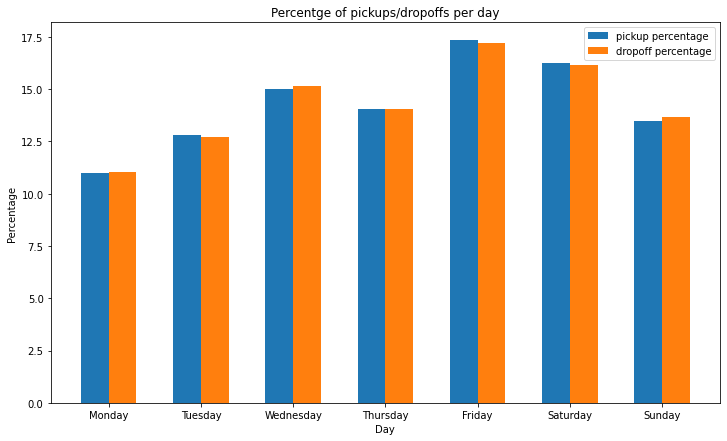

In [11]:
# plotting
plt.figure(figsize=(12,7))
ind = np.arange(7)
width = 0.3       

plt.bar(ind, pickup_day_percentage.values , width, label='pickup percentage')
plt.bar(ind + width, dropoff_day_percentage, width, label='dropoff percentage')
plt.xlabel("Day")
plt.ylabel("Percentage")
plt.title("Percentge of pickups/dropoffs per day")
plt.xticks(ind + width / 2, day_order)
plt.legend(loc='best');

#### there is not a noticable difference between pickup rate vs. dropoff rate in each day. but, these rates are higher in "Wednesday", "Friday" & "Saturday". since Friday & Saturday are the weekend, there is a higher rate at those days(people go out of town or to parties & occasions).

6. Number of pick-ups and drop-offs per hour of day

In [6]:
# adding "pickup_hour" & "dropoff_hour" columns to dataset
taxis['pickup_hour'] = taxis['pickup'].dt.hour
taxis['dropoff_hour'] = taxis['dropoff'].dt.hour

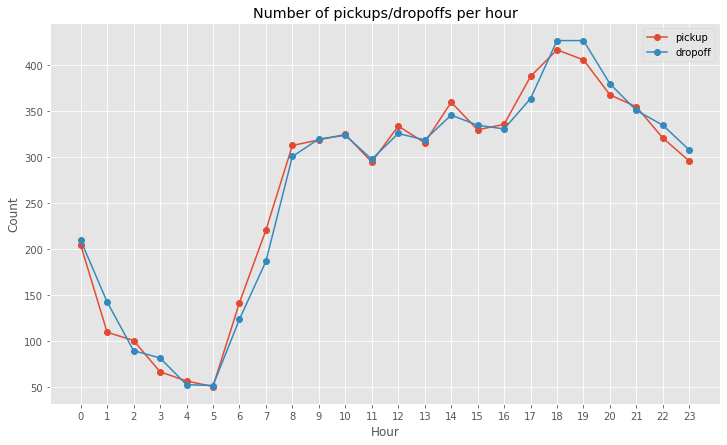

In [13]:
# plotting
plt.figure(figsize=(12,7))
ind = np.arange(0,24)      
plt.style.use('ggplot')
plt.plot(ind, taxis.groupby('pickup_hour')['pickup_hour'].count() ,marker='o', label='pickup')
plt.plot(ind, taxis.groupby('dropoff_hour')['dropoff_hour'].count(),marker='o',label='dropoff')
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Number of pickups/dropoffs per hour")
plt.xticks(ind)
plt.legend(loc='best');

#### we have a decreasing number of rides in the first few hours of day(0 to 5), with 5:00 A.M. being the lowest. these hours are the normal sleeping hours, so this observation was expected. since then, we have an increasing pattern in the number of rides, with 6-7 P.M. having the highest numbers. most people get of work around 6-7 P.M. or go out for dinner. this explains the peak in those hours. then, as we get closer to the end of the night the number of rides decreses (as it reaches people's bedtime).

7.  Most frequents payment per weekday

In [7]:
most_frequent_payment = taxis.groupby(['pickup_day','payment']).size()
most_frequent_payment = most_frequent_payment.reset_index().sort_values(by=['pickup_day', 'payment'], ascending=[True, False]).set_index(['pickup_day', 'payment'])
most_frequent_payment.reset_index(inplace=True, level=['pickup_day'])
most_frequent_payment.reset_index(inplace=True, level=['payment'])
most_frequent_payment.rename(columns = {0:'count'},inplace=True)
most_frequent_payment1 = most_frequent_payment.drop_duplicates(subset='pickup_day', keep="first").reset_index(drop=True).copy()
most_frequent_payment1

,payment,pickup_day,count
0,credit card,Friday,790
1,credit card,Monday,502
2,credit card,Saturday,704
3,credit card,Sunday,605
4,credit card,Thursday,665
5,credit card,Tuesday,595
6,credit card,Wednesday,716


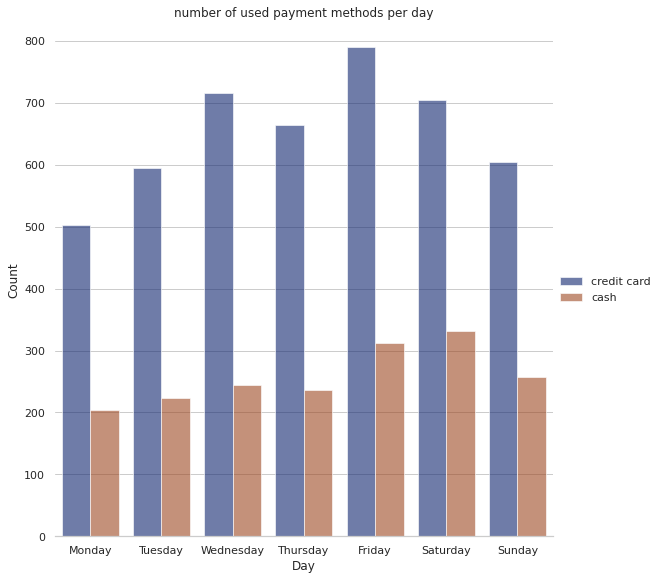

In [15]:
# plotting
sns.set_theme(style="whitegrid")
g = sns.catplot(data=most_frequent_payment, kind="bar",x="pickup_day", y="count",order= day_order, hue="payment",palette="dark", alpha=.6,height = 8).set(title="number of used payment methods per day")
g.despine(left=True)
g.set_axis_labels("Day", "Count")
g.legend.set_title("")

#### everyday, the number of payments made by credit card is significantly higher than the number of payments made by cash. since this data belongs to the year 2019, this observation seems logical. because in recent years, credit cards have almost completely taken over cash. <br>We see the most number of payments made by cash in "Saturday", which might be because people tip more in cash on the weekend.

8. Number of trips per passengers

#### part a

In [7]:
def categorize(x):
  if x <= 200:
    return "low"
  elif x < 500:
    return "middle"
  else:
    return "high"


df1 = taxis[['passengers']]
df1['count_trips'] = taxis.groupby('passengers')['passengers'].transform('count')
df1.drop_duplicates(inplace=True,keep='first')
df1 = df1.sort_values(by='passengers').reset_index(drop=True)
df1['category'] = df1.count_trips.apply(categorize)
df1['category'] = pd.Categorical(df1['category'], ["low", "middle", "high"])
df1

,passengers,count_trips,category
0,0,96,low
1,1,4678,high
2,2,876,high
3,3,243,middle
4,4,110,low
5,5,277,middle
6,6,153,low


In [9]:
df2 = df1.groupby('category')['category'].count().to_frame()
df2.columns = ['count']
df2.sort_values(by='category',inplace=True)
df2

,count
category,
low,3
middle,2
high,2


### part b

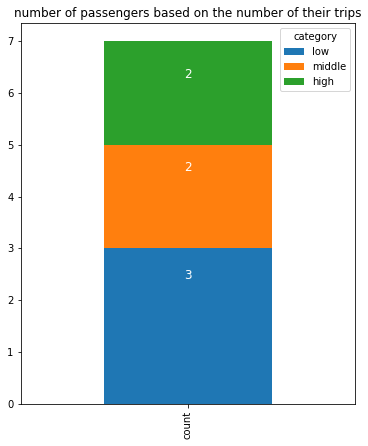

In [38]:
pd.DataFrame(df2['count']).T.plot(kind='bar', stacked=True,figsize=(6, 7),title ='number of passengers based on the number of their trips')
plt.text(0,df2.values[0]*0.8,df2.iloc[0,0],ha = 'center',color = "white",fontsize=12)
plt.text(0,(df2.values[0]+df2.values[1])*0.9,df2.iloc[1,0],ha = 'center',color = "white",fontsize=12)
plt.text(0,df2.values.sum()*0.9,df2.iloc[2,0],ha = 'center',color = "white",fontsize=12);

#### I used stacked bar chart to show the number of passenger for each category (their category based on the number of trips they've made). I used this plot as a better substitution for pie chart. we have 7 passengers overall (with IDs: 0-6). 3 of them fall into the "low" category (they take taxi less than others). while 2 of passengers take taxis moderately ("middle" category) & the other 2, take taxis more frequently("high" category).

9. Number of trips with or without a dropoff-zone

In [18]:
na_doz_idx = taxis.dropoff_zone.isna()
notna_doz_idx = ~taxis.dropoff_zone.isna()

print(f"number of trips with unspecified dropoff zone: {na_doz_idx.sum()}")
print(f"number of trips with specified dropoff zone: {notna_doz_idx.sum()}")

number of trips with unspecified dropoff zone: 45
number of trips with specified dropoff zone: 6388


10.Most frequent color among trips with a dropoff-zone

In [19]:
color_taxi_notna = pd.DataFrame(taxis.loc[notna_doz_idx,'color']).reset_index(drop=True)
color_taxi_notna['count'] = color_taxi_notna.groupby('color')['color'].transform('count')
color_taxi_notna = color_taxi_notna.drop_duplicates(keep='first').reset_index(drop=True)
color_taxi_notna.loc[color_taxi_notna['count'] == color_taxi_notna['count'].max(),:]

,color,count
0,yellow,5415


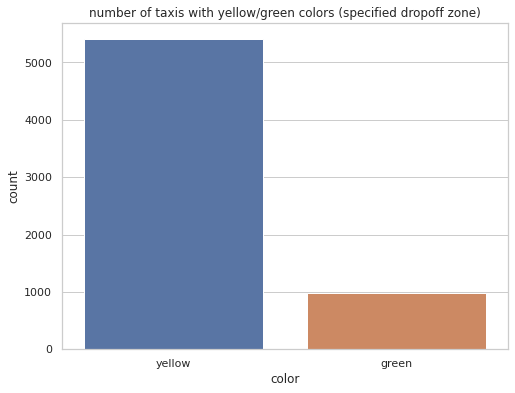

In [20]:
plt.figure(figsize=(8,6))
sns.barplot(data=color_taxi_notna, x="color", y="count").set(title="number of taxis with yellow/green colors (specified dropoff zone)");

## Part2 - Dimention Rednction

### Selection

#### We investigate 2 feature selection methods. the first approach is based on manuel analysis of the data which serve it as a baseline for our feature selection methods. then for the second approach we conducted an automatic feature slection method. these 2 methods are explained in the following:

## Method 1 - Manual Feature Selection

In [91]:
taxis = sns.load_dataset('taxis')
taxis_x = taxis.loc[:,['passengers','distance',	'fare',	'tip',	'tolls']]
taxis_y = taxis['total']

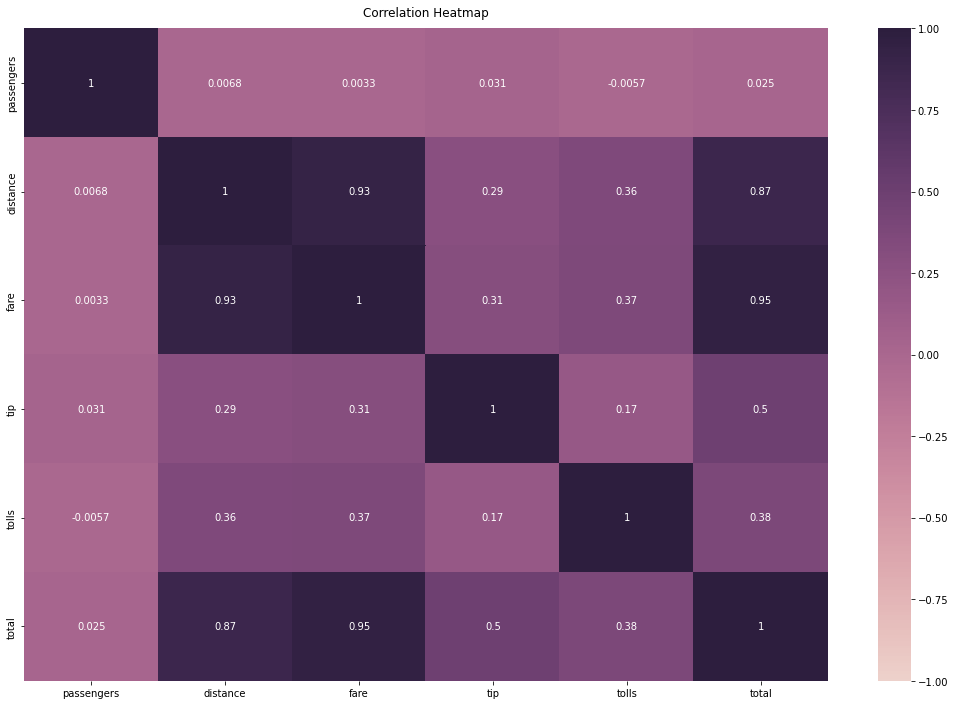

In [87]:
corr_mat = taxis.corr(method = 'spearman')
plt.figure(figsize=(18,12))
heatmap = sns.heatmap(corr_mat, vmin=-1, vmax=1, annot=True,cmap=sns.cubehelix_palette(as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### In this approach we just considered the numerical features.by considering these features, we have the highest correlation with the "total" ascendingly: <br>"fare"(0.95), "distance"(0.87), "tip"(0.5), "tolls"(0.38) and "passengers"(0.025)<br>amongst these features "fare" & "distance" have a really high correlation(0.93) with each other, so I choose -> "fare"<br>then "tips" and "tolls". <br> "passengers" have almost no linear correlation with "total", so I won't choose it for now
### my chosen features are: "fare", "tips", "tolls"

## Method 2 - Automatic Feature Selection

#### after preprocessing the data with the function below, we calculate correlation matrix & group strongly correalted features (with a predefined threshold i.e. corr= 0.9) together.<br>Then we want to select one feature from each group & drop others. to do so, we calculate feature importance of each feature using `permutation feature importance` method where `Linear Regressin Model` is used as a base classifier.<br>Afterward, we select the feature with the highest feature imporatnce from each group.<br> additionally, we set drop the features with a permutation importance value lower than an specified threshold. 

In [22]:
# this function loads the data & preprocess it as we want(we can remove some columns, define what we want to predict, whether we want to normalize the data,
# and if we want to OneHot encode the categorical features)

def load_and_preprocess(forbidden_cols=[],target='total',minmax_scaler=True,onehot=True):
    taxis = sns.load_dataset('taxis')
    taxis = taxis.dropna()

    cats = ['color', 'payment', 'pickup_zone', 'dropoff_zone', 'pickup_borough', 'dropoff_borough']
    target_col_name = target
    y = taxis[target_col_name]
    X = taxis.drop([target_col_name] +forbidden_cols, axis=1)

    if 'pickup' not in forbidden_cols:
        X.pickup = pd.to_datetime(X.pickup)
        X['pickup_hour'] = X['pickup'].dt.hour
        X["pickup_day"] = X.pickup.dt.day_name().astype("category")
        cats += ["pickup_day"]

    if 'dropoff' not in forbidden_cols:
        X.dropoff = pd.to_datetime(X.dropoff)
        X['dropoff_hour'] = X['dropoff'].dt.hour
        X["dropoff_day"] = X.dropoff.dt.day_name().astype("category")
        cats += ["dropoff_day"]

    cats = list(set(cats).difference(forbidden_cols))
    for item in cats:
        X[item] = X[item].astype("category")

    X = X.drop(list(set(['dropoff', 'pickup']).difference(forbidden_cols)), axis=1)

    if onehot:
       X = pd.get_dummies(X, columns=cats, dtype=np.float64, prefix_sep='_')
    X.columns = [c.replace(" ", "_") for c in X.columns]
    cols=X.columns
    if minmax_scaler:
      scaler = StandardScaler().fit(X)
      X = scaler.transform(X)
    if X is not pandas.core.frame.DataFrame:
        X=pd.DataFrame(X,columns=cols)
    return X,y

In [65]:
all_cols=set(['pickup','dropoff','passengers','distance','fare','tip','tolls','color','payment','pickup_zone','dropoff_zone','pickup_borough','dropoff_borough'])
X,y=load_and_preprocess(onehot=True,minmax_scaler=True,forbidden_cols=['passengers'])

In [66]:
# this function groups strongly correlated features together with respect to the given threshold

def group_correlated_feats(corr_mat,threshold=0.9):
        features_to_drop_ = set()
        _examined_features = set()
        correlated_feature_sets_ = []

        # for each feature in the dataset (columns of the correlation matrix)
        for feature in corr_mat.columns:

            if feature not in _examined_features:

                # append so we can exclude when we create the combinations
                _examined_features.add(feature)

                # here we collect potentially correlated features
                # we need this for the correlated groups sets
                _temp_set = set([feature])

                # features that have not been examined, are not currently examined and
                # were not found correlated
                _features_to_compare = [
                    f for f in corr_mat.columns if f not in _examined_features
                ]

                # create combinations:
                for f2 in _features_to_compare:

                    # if the correlation is higher than the threshold
                    # we are interested in absolute correlation coefficient value
                    if abs(corr_mat.loc[f2, feature]) > threshold:

                        # add feature (f2) to our correlated set
                        features_to_drop_.add(f2)
                        _temp_set.add(f2)
                        _examined_features.add(f2)

                # if there are correlated features
                if len(_temp_set) > 1:
                    correlated_feature_sets_.append(_temp_set)

        # save input features
        return correlated_feature_sets_

In [67]:
gcf = group_correlated_feats(X.corr(method='spearman'))
gcf

[{'distance', 'fare'},
 {'dropoff_hour', 'pickup_hour'},
 {'dropoff_zone_Auburndale', 'pickup_zone_Whitestone'},
 {'dropoff_zone_Jamaica_Estates', 'pickup_zone_Crotona_Park_East'},
 {'dropoff_zone_Ozone_Park', 'pickup_zone_Queens_Village'},
 {'color_green', 'color_yellow'},
 {'payment_cash', 'payment_credit_card'},
 {'dropoff_day_Friday', 'pickup_day_Friday'},
 {'dropoff_day_Monday', 'pickup_day_Monday'},
 {'dropoff_day_Saturday', 'pickup_day_Saturday'},
 {'dropoff_day_Sunday', 'pickup_day_Sunday'},
 {'dropoff_day_Thursday', 'pickup_day_Thursday'},
 {'dropoff_day_Tuesday', 'pickup_day_Tuesday'},
 {'dropoff_day_Wednesday', 'pickup_day_Wednesday'}]

In [68]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [69]:
# this cell calculates the permutation importance of each feature based on Linear Regression Model & Root Mean Square metric

from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression

result = permutation_importance(LinearRegression().fit(X,y), X, y, n_repeats=10,random_state=42,scoring=make_scorer(mean_squared_error, squared=True))
feat_imp = pd.DataFrame(NormalizeData(result.importances).T,columns=list(X.columns))
feat_imp_mean = feat_imp.mean(axis=0)
feat_imp_mean = feat_imp_mean.sort_values(ascending=False)
feat_imp_mean

distance                         1.000000
tip                              1.000000
tolls                            1.000000
pickup_hour                      1.000000
dropoff_hour                     1.000000
                                   ...   
dropoff_zone_Stapleton           0.845407
pickup_borough_Brooklyn          0.781933
dropoff_borough_Staten_Island    0.690968
payment_credit_card              0.015068
payment_cash                     0.015068
Length: 430, dtype: float64

In [85]:
# this cell selects the most important feature from each group of correlated features

all_feats=list(X.columns)
feats_to_drop = []
for g in gcf:
  feats = list(g)
  selected_feat = feat_imp_mean[feats].index[0]
  drop_feats = g.difference(set([selected_feat]))
  feats_to_drop += list(drop_feats)

X=X.loc[:,list(set(all_feats).difference(set(feats_to_drop)))]
X.head(5)

,dropoff_hour,tip,fare,tolls
0,0.988807,0.075071,-0.549175,-0.229932
1,0.336019,-0.835286,-0.735718,-0.229932
2,0.662413,0.163990,-0.502540,-0.229932
3,-2.111935,1.768759,1.316252,-0.229932
4,-0.153571,-0.369522,-0.362633,-0.229932


In [84]:
# this cell selects features with high feature importance from the remained features

feat_imp_thr = 1
X = X.loc[:,list(set(feat_imp_mean[feat_imp_mean.values >= feat_imp_thr].index).intersection(set(X.columns)))]
X.head(5)

,dropoff_hour,tip,fare,tolls
0,0.988807,0.075071,-0.549175,-0.229932
1,0.336019,-0.835286,-0.735718,-0.229932
2,0.662413,0.163990,-0.502540,-0.229932
3,-2.111935,1.768759,1.316252,-0.229932
4,-0.153571,-0.369522,-0.362633,-0.229932


### the selected features by this method are: 'dropoff_hour', 'tip', 'fare', 'tolls'

### PCA

### we performed PCA with just the numerical features (so in the next section, I'm gonna compare feature selection using method 1 with PCA)

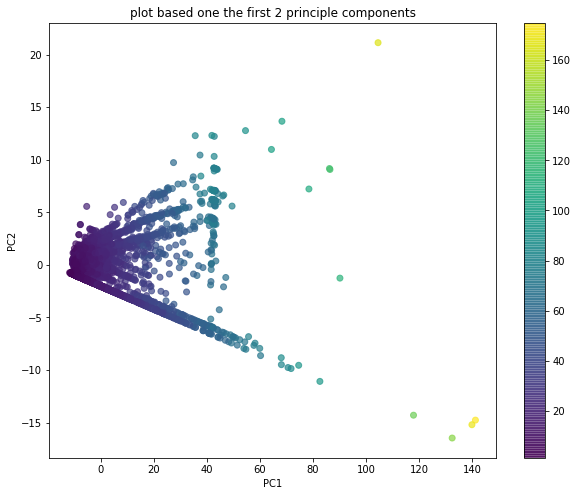

In [12]:
# PCA
from sklearn.decomposition import PCA
plt.figure(figsize=(10,8))
pca = PCA().fit(taxis_x)
X_transformed=pca.transform(taxis_x)
plot=plt.scatter(X_transformed[:,0],X_transformed[:,1],c=taxis_y,alpha=0.7)
plt.colorbar()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('plot based one the first 2 principle components');

Text(0.5, 1.0, 'Explained Variance for PCA')

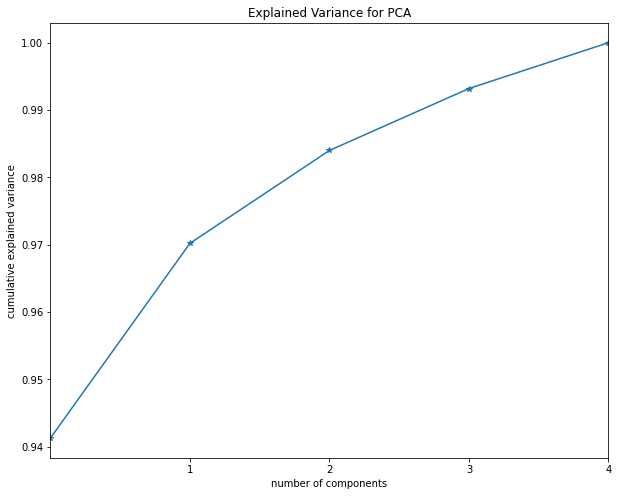

In [104]:
plt.figure(figsize=(10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='*')
plt.xlim(0,4,1)
plt.xticks(range(1,5))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Explained Variance for PCA')

#### by looking the "explained variance" plot, with 2 components, 97% of the variance of the numerical features can be explained. so choosing 2 PCs, would be good. 

### part C

#### it is done in the PCA code ( `X_transformed=pca.transform(taxis_x)`)

# Q3

#### both these method were explained in their own section. now for comparing them we did:<br> 1. trained 2 `Regression Model`s with their selected features<br>2. we examined the trained models with respect to Mean Root Square Error<br>3. we observed that simple Linear models can predict the response variable (`total`) with small error<br>4. thereforfe, we concluded that the response variable enjoys the linear relationship with explanatory variables<br>5. all in all, PCA , Manual feature selection & Automatic feature selection methods achieve almost the same performance<br>6. so, we prefer PCA because it suffices our needs & it's simple

I

## Part3 - Using Figure

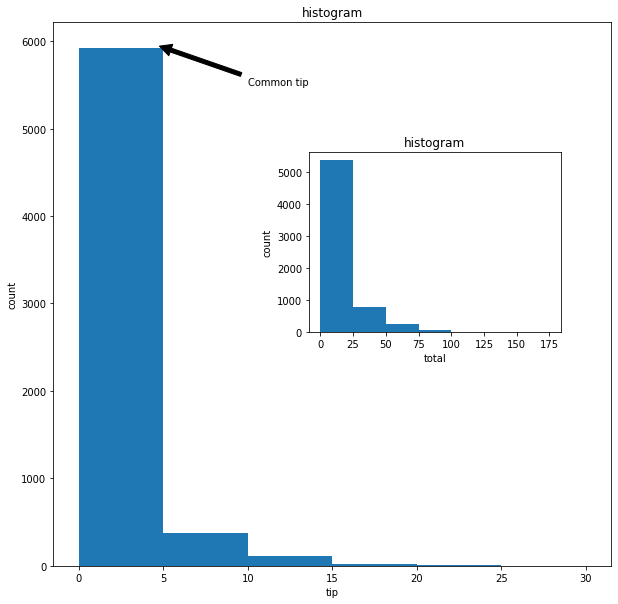

In [11]:
#Plot
fig , ax = plt.subplots(figsize=(10,10))
ax.hist(taxis.tip, bins = [0, 5, 10, 15, 20, 25, 30])
ax.set_xlabel('tip')
ax.set_ylabel('count')
ax.set_title('histogram')
ax.annotate('Common tip',xytext = (10, 5500),xy = (4.5, len(taxis[taxis.tip <= 5])-1),arrowprops = { 'facecolor' : 'black', 'shrink' : 0.05 })
l, b, h, w = .48, .45, .25, .35
ax2 = fig.add_axes([l, b, w, h])
ax2.hist(taxis.total, bins = [0, 25, 50, 75, 100, 125, 150, 175])
ax2.set_xlabel('total')
ax2.set_ylabel('count')
ax2.set_title('histogram');
